In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
spam=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [6]:
spam.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2154,ham,Oh god i am happy to see your message after 3 ...,NaN,NaN,NaN
3020,ham,Am in film ill call you later.,NaN,NaN,NaN
1762,ham,Sometimes Heart Remembrs someone Very much... ...,NaN,NaN,NaN
2307,spam,WIN a year supply of CDs 4 a store of ur choic...,NaN,NaN,NaN
3898,ham,ÌÏ mean it's confirmed... I tot they juz say o...,NaN,NaN,NaN


In [7]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
spam.shape

(5572, 5)

##Cleaning_the_data
- drop the unnecessary columns


In [9]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [10]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


the columns names have no meaning o i decided to change the names


In [11]:
spam.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
spam.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


lets convert spam to 0 and ham to 1

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

label encoder encodes textual data to numbers

In [14]:
spam['target']=encoder.fit_transform(spam['target'])

In [15]:
spam.isnull().sum()

,0
target,0
text,0


- checking for duplicates

In [ ]:
spam.duplicated().sum()

np.int64(403)

In [16]:
#drop all the duplicates except for its first occurance
spam.drop_duplicates(keep='first',inplace=True)

In [17]:
spam.shape

(5169, 2)

#Lets_do_the_EDA

In [18]:
spam['target'].value_counts()

,count
target,
0,4516
1,653


<Axes: ylabel='count'>

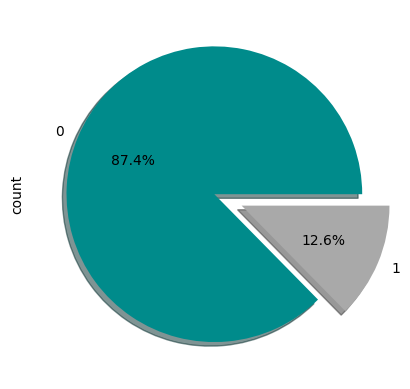

In [19]:
from enum import auto
spam['target'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['darkcyan','darkgrey'],explode=[0,0.2],shadow=True)

Clearly the data is imbalanced

we will need the natural language tool kit as we are dealing with textual data futher along in the process

In [27]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

- finding the number of words,char,and sentences
- this will help in comparing the spams and hams and doing the eda

In [28]:
#finfing number of charecters in each email
spam['num_char']=spam['text'].apply(len)

In [29]:
spam.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
#word tokenizers gives the words and then the len() function will give us thge number of words used
spam['num_words']=spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
#the same is for sentences
spam['num_sentances']=spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
spam.head()

,target,text,num_char,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
spam[['num_char','num_words','num_sentances']].describe()

,num_char,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
spam[spam['target']==0][['num_char','num_words','num_sentances']].describe()

,num_char,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
spam[spam['target']==1][['num_char','num_words','num_sentances']].describe()

,num_char,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

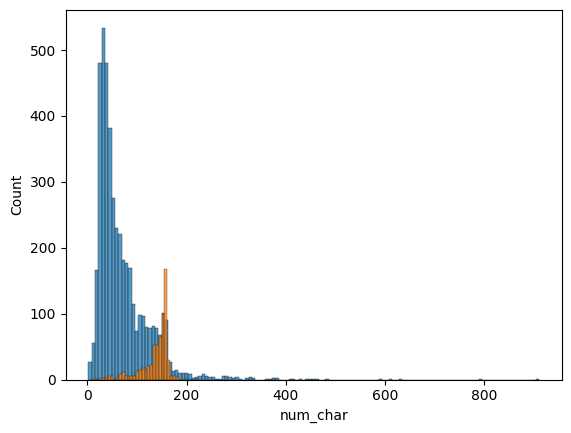

In [ ]:
sns.histplot(spam[spam['target']==0]['num_char'])
sns.histplot(spam[spam['target']==1]['num_char'])

## as it is clear that on average spam email uses more words then ham emails but there are some exceptional cases but they are not too much so lets ignore them for now

### we have to keep in mind that the data is imbalanced
- you can try out under sampling and oversampling and somte but for know im ignoring them

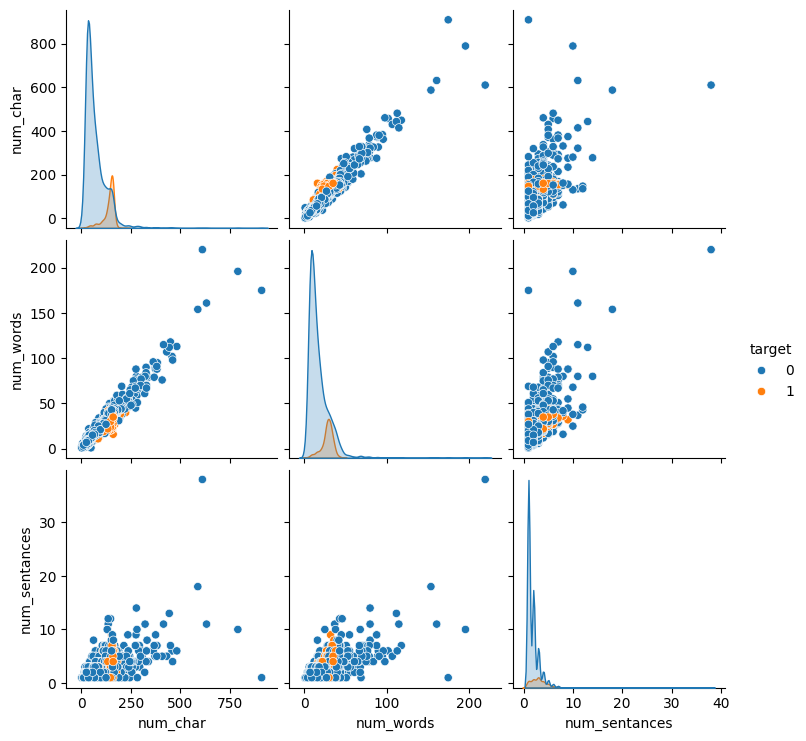

In [ ]:
sns.pairplot(spam,hue='target')

##Data_PreProcessing


- lower case
- tokenization
- removing special charecters
- removing stop words and punctuations
- stemming

In [33]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps=PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- we are transforiming the text so to make it ready for vectorization
- the first thing is to convert all the charecters in lower case
-  then we will check mif the data is alpha numeric we will add it to the text
- we will remove stopwords to reduce token numbers it would be more efficient while doing vectorization
- we removed punctuations and then stemming the words means bringing it to the simplest form which is good for this case but if your working on something that is gramatically sensitive such as a translator then you shpouyld try other methods

In [34]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [37]:
# testing the function although i did tested it multuiplt times

transform_text("i loved the ml playlist .how about uh?")

'love ml playlist uh'

In [38]:
# applying over function on the text
spam['transformed_text']=spam['text'].apply(transform_text)

In [ ]:
spam.head()

,target,text,num_char,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##lets generate the word cloud




- looking for some of the common words used in the emails both spam and ham to build an understanding of the underlying concept

In [ ]:
# importing wordcloud from lib
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

you may be confused about the next line
- what this does is that it converts all the spam category emails into a huge string and then seprate it by space and gets count of the words

In [ ]:
spam_wc=wc.generate(spam[spam['target']==1]['transformed_text'].str.cat(sep=" "))

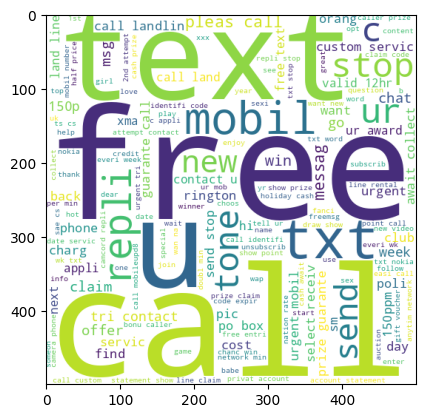

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(spam[spam['target']==0]['transformed_text'].str.cat(sep=" "))

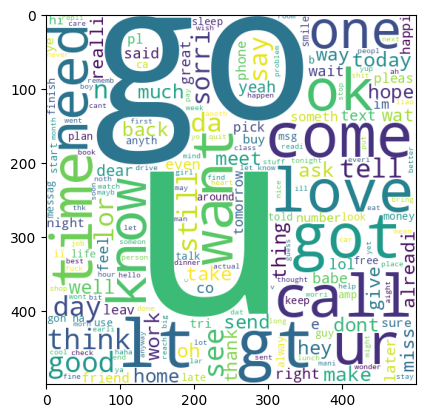

In [ ]:
plt.imshow(ham_wc)

here we did the same thing but with custom written code and a library you will bweetter understand it this way

lets check for the top words used

In [ ]:
spam_corpus=[]
for msg in spam[spam['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter

In [ ]:
Counter(spam_corpus).most_common(2)

[('call', 320), ('free', 191)]

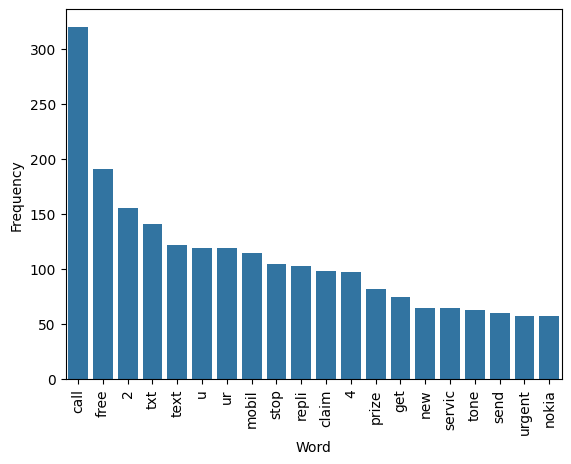

In [ ]:

df = pd.DataFrame(Counter(spam_corpus).most_common(20), columns=['Word', 'Frequency'])


sns.barplot(x='Word', y='Frequency', data=df)
plt.xticks(rotation=90)
plt.show()

##Building_Model

we are importing some libraries which convert the text into vectors
- i can explain this too but this will be alot writing then and im probably not good with writing hahaha

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=cv.fit_transform(spam['transformed_text']).toarray()
y=spam['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


there are a couple of naive bayes to try on
- you may wonder why naieve bayes its because while dealing with textual data its a rule of thumb
- but dont worry we will try other ones too but only the famous ones

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

## lets try it on bag of words its quite basic but you never know which ones best

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


the precision is low which could be dangerous in this scenario because its critical

## Trying with TF-IDF

In [ ]:
X=tfidf.fit_transform(spam['transformed_text']).toarray()
y=spam['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


## here you go darling thats exactly what we need fellas the mnb did the work deserves a kiss

In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#Trying other Algorithms

letsb try the side chicks

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

im not in the mood to play much with the hyperparameters ....

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
abc=AdaBoostClassifier(n_estimators=100,random_state=2)
bc=BaggingClassifier(n_estimators=100,random_state=2)
etc=ExtraTreesClassifier(n_estimators=100,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=100,random_state=2)
xgb=XGBClassifier(n_estimators=100,random_state=2)


In [ ]:
def train_classifier(classifier,X_train,y_train,X_test,y_test):
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
accuracy_scores=[]
precision_scores=[]
classifiers=[svc,knc,mnb,dtc,lrc,abc,bc,etc,gbdt,xgb]
for classifier in classifiers:
  current_accuracy,current_precision=train_classifier(classifier,X_train,y_train,X_test,y_test)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

In [ ]:
performance=pd.DataFrame({'Algorithm':classifiers,'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

##probably the mnb is a wifey material in this case  🤭

In [ ]:
performance

,Algorithm,Accuracy,Precision
1,KNeighborsClassifier(),0.905222,1.000000
2,MultinomialNB(),0.970986,1.000000
7,"(ExtraTreeClassifier(random_state=1872583848),...",0.979691,0.983471
0,"SVC(gamma=1.0, kernel='sigmoid')",0.975822,0.974790
4,"LogisticRegression(penalty='l1', solver='libli...",0.955513,0.960000
9,"XGBClassifier(base_score=None, booster=None, c...",0.970019,0.957265
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.958414,0.943925
6,(DecisionTreeClassifier(random_state=114693939...,0.957447,0.861538
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.931335,0.852632
3,DecisionTreeClassifier(max_depth=5),0.931335,0.838384


now lets dump the model

In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(tfidf,open('vectorizer.pkl','wb'))
pkl.dump(mnb,open('model.pkl','wb'))